In [74]:
import pickle
import numpy as np
from load_pickle import get_outputs
from itertools import product
import matplotlib.pyplot as plt
from scipy import io
from scipy import stats
import pandas as pd
import seaborn as sns
import os

cwd = os.getcwd()

from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from utils import *

data_folder = '/Users/kendranoneman/Projects/mayo/data/neural-decoding/outpickles/'
fig_folder='/Users/kendranoneman/Projects/mayo/NeuralDecoding/figures/' 

colors2 = ['purple', 'blue','cyan','mediumaquamarine','green','yellowgreen','gold','orange', 'magenta', 'red','gray'] #Colors to plot each method
colors = ['mediumorchid','seagreen','cornflowerblue','gold']
ill=0 #Whether I am making these plots for exporting to adobe illustrator (in which case I remove the text)

sessions = [18,20,22,24,29]
mt_perSess = [24,24,24,25,24]
fef_perSess = [23,32,28,24,41]

In [75]:
def get_outputs(result_dir,load_folder):
    num_folds = int(result_dir[35:37])
    num_repeats = int(result_dir[-5:-1])
    
    pairs = list(product(range(num_folds), range(num_repeats)))
    #print(pairs)
    
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,time_elapsed,max_params,neuron_inds = [],[],[],[],[],[],[],[],[]
    for j in range(len(pairs)):
        if os.path.isfile(data_folder+result_dir+'fo'+str(pairs[j][0])+'_re'+str(pairs[j][1])+'.pickle'):
            with open(data_folder+result_dir+'fo'+str(pairs[j][0])+'_re'+str(pairs[j][1])+'.pickle','rb') as f:
                y_train0,y_test0,y_train_pred0,y_test_pred0,r2s,rhs,te,params,ninds=pickle.load(f,encoding='latin1')
                y_train.append(y_train0)
                y_test.append(y_test0)
                y_train_pred.append(y_train_pred0)
                y_test_pred.append(y_test_pred0)
                R2s.append(r2s)
                rhos.append(rhs)
                time_elapsed.append(te)
                max_params.append(params)
                neuron_inds.append(ninds)
    
    return y_train, y_test, y_train_pred, y_test_pred, R2s, rhos, time_elapsed, max_params, neuron_inds

In [76]:
y_test_pred_wf,R2s_wf,rhos_wf,te_wf = [[] for i in range(len(sessions))],[[] for i in range(len(sessions))],[[] for i in range(len(sessions))],[[] for i in range(len(sessions))]
y_test_pred_wc,R2s_wc,rhos_wc,te_wc = [[] for i in range(len(sessions))],[[] for i in range(len(sessions))],[[] for i in range(len(sessions))],[[] for i in range(len(sessions))]
for s in range(len(sessions)):
    # Wiener Filter
    data_dirs = ['s'+str(sessions[s])+'-t0-d050-m00-o0-nm22-nf00-bn0-fo10-fi03-r0050/','s'+str(sessions[s])+'-t0-d050-m00-o0-nm00-nf22-bn0-fo10-fi03-r0050/','s'+str(sessions[s])+'-t0-d050-m00-o0-nm11-nf11-bn0-fo10-fi03-r0050/','s'+str(sessions[s])+'-t0-d050-m00-o0-nm'+str(mt_perSess[s])+'-nf'+str(fef_perSess[s])+'-bn0-fo10-fi03-r0050/']
    for i in range(len(data_dirs)):
        y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
        y_test_pred_wf[s].append(y_test_pred)
        R2s_wf[s].append(R2s)
        rhos_wf[s].append(rhos)
        te_wf[s].append(te)

    #print(max(max(te_wf))/60)

    # Wiener Cascade
    
    data_dirs = ['s'+str(sessions[s])+'-t0-d050-m01-o0-nm22-nf00-bn0-fo10-fi03-r0050/','s'+str(sessions[s])+'-t0-d050-m01-o0-nm00-nf22-bn0-fo10-fi03-r0050/','s'+str(sessions[s])+'-t0-d050-m01-o0-nm11-nf11-bn0-fo10-fi03-r0050/','s'+str(sessions[s])+'-t0-d050-m01-o0-nm'+str(mt_perSess[s])+'-nf'+str(fef_perSess[s])+'-bn0-fo10-fi03-r0050/']
    for i in range(len(data_dirs)):
        y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
        y_test_pred_wc[s].append(y_test_pred)
        R2s_wc[s].append(R2s)
        rhos_wc[s].append(rhos)
        te_wc[s].append(te)

    #print(max(max(te_wc))/60)
    

'''
# XGBoost
y_test_pred_xgb,R2s_xgb,rhos_xgb,te_xgb = [],[],[],[]
data_dirs = ['s00-t0-d050-m02-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m02-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m02-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_xgb.append(y_test_pred)
    R2s_xgb.append(R2s)
    rhos_xgb.append(rhos)
    te_xgb.append(te)
    
print(max(max(te_xgb))/3600)
    
# SVR
y_test_pred_svr,R2s_svr,rhos_svr,te_svr = [],[],[],[]
data_dirs = ['s00-t0-d050-m03-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m03-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m03-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_svr.append(y_test_pred)
    R2s_svr.append(R2s)
    rhos_svr.append(rhos)
    te_svr.append(te)
    
print(max(max(te_svr))/3600)

    
# DNN
y_test_pred_dnn,R2s_dnn,rhos_dnn,te_dnn = [],[],[],[]
data_dirs = ['s29-t0-d050-m04-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s29-t0-d050-m04-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s29-t0-d050-m04-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_dnn.append(y_test_pred)
    R2s_dnn.append(R2s)
    rhos_dnn.append(rhos)
    te_dnn.append(te)
    
print(max(max(te_dnn))/3600)


    
# RNN
y_test_pred_rnn,R2s_rnn,rhos_rnn,te_rnn = [],[],[],[]
data_dirs = ['s00-t0-d050-m05-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m05-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m05-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_rnn.append(y_test_pred)
    R2s_rnn.append(R2s)
    rhos_rnn.append(rhos)
    te_rnn.append(te)
    
# GRU
y_test_pred_gru,R2s_gru,rhos_gru,te_gru = [],[],[],[]
data_dirs = ['s00-t0-d050-m06-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m06-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m06-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_gru.append(y_test_pred)
    R2s_gru.append(R2s)
    rhos_gru.append(rhos)
    te_gru.append(te)
'''

"\n# XGBoost\ny_test_pred_xgb,R2s_xgb,rhos_xgb,te_xgb = [],[],[],[]\ndata_dirs = ['s00-t0-d050-m02-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m02-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m02-o0-nm12-nf12-bn0-fo10-fi03-r0010/']\nfor i in range(len(data_dirs)):\n    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)\n    y_test_pred_xgb.append(y_test_pred)\n    R2s_xgb.append(R2s)\n    rhos_xgb.append(rhos)\n    te_xgb.append(te)\n    \nprint(max(max(te_xgb))/3600)\n    \n# SVR\ny_test_pred_svr,R2s_svr,rhos_svr,te_svr = [],[],[],[]\ndata_dirs = ['s00-t0-d050-m03-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m03-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m03-o0-nm12-nf12-bn0-fo10-fi03-r0010/']\nfor i in range(len(data_dirs)):\n    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)\n    y_test_pred_svr.append(y_test_pred)\n    R2s_svr.append(R2s)\n    rhos_svr.append(rhos)\n    

In [77]:
vals = []
vals_mt,vals_fef,vals_mtfef,vals_all = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
m = 0
models = ['wf','wc']#,'xgb','svr','dnn','rnn','gru']
for s in range(len(sessions)):
    for m in range(4):
        vals = pd.DataFrame(np.hstack((R2s_wf[s][m],R2s_wc[s][m])).T, columns = ['r2'])#,R2s_xgb[m],R2s_svr[m],R2s_dnn[m],R2s_rnn[m],R2s_gru[m]
        vals['rho'] = np.hstack((rhos_wf[s][m],rhos_wc[s][m])).T #,rhos_xgb[m],rhos_svr[m],rhos_dnn[m],rhos_rnn[m],rhos_gru[m]
        vals['time'] = np.hstack((te_wf[s][m],te_wc[s][m])).T #,te_xgb[m],te_svr[m],te_dnn[m],te_rnn[m],te_gru[m]
        vals['sess'] = sessions[s]
        if m==0:
            vals['Brain Area'] = 'mt only'
        elif m==1:
            vals['Brain Area'] = 'fef only'
        elif m==2:
            vals['Brain Area'] = 'mt+fef'
        elif m==3:
            vals['Brain Area'] = 'all'
        model_sizes = [len(te_wf[s][m]),len(te_wc[s][m])]#,len(te_xgb[m]),len(te_svr[m]),len(te_dnn[m]),len(te_rnn[m]),len(te_gru[m])]
        #print(model_sizes)
        pos_add = 0
        for d in range(2):
            vals.loc[pos_add:pos_add+model_sizes[d]-1, 'model'] = models[d]
            pos_add += model_sizes[d]
            
        if m==0:
            good_inds = vals['r2'] >= 0
        else:
            good_inds = good_inds & (vals['r2'] >= 0)

        if m==0:
            vals_mt1 = vals
        elif m==1:
            vals_fef1 = vals
        elif m==2:
            vals_mtfef1 = vals
        elif m==3:
            vals_all1 = vals

    vals_mt = pd.concat([vals_mt,vals_mt1[good_inds]],ignore_index=True)
    vals_fef = pd.concat([vals_fef,vals_fef1[good_inds]],ignore_index=True)
    vals_mtfef = pd.concat([vals_mtfef,vals_mtfef1[good_inds]],ignore_index=True)
    vals_all = pd.concat([vals_all,vals_all1[good_inds]],ignore_index=True)
    
    print(vals_mt.shape)
    print(vals_fef.shape)
    print(vals_mtfef.shape)
    print(vals_all.shape)
df = pd.concat([vals_mt, vals_fef, vals_mtfef, vals_all],    # Combine vertically
                ignore_index = True,
                sort = False)

df['time'] = df['time']/3600
#df['time'] = (df['time'] - df['time'].min()) / (df['time'].max() - df['time'].min())

#print(df.shape)
df.head(10)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df)


(571, 6)
(571, 6)
(571, 6)
(571, 6)
(1404, 6)
(1404, 6)
(1404, 6)
(1404, 6)
(2366, 6)
(2366, 6)
(2366, 6)
(2366, 6)
(3250, 6)
(3250, 6)
(3250, 6)
(3250, 6)
(4197, 6)
(4197, 6)
(4197, 6)
(4197, 6)


,r2,rho,time,sess,Brain Area,model
0,0.236543,0.512473,0.011933,18,mt only,wf
1,0.218481,0.500293,0.011938,18,mt only,wf
2,0.221597,0.502493,0.011936,18,mt only,wf
3,0.219925,0.501566,0.011933,18,mt only,wf
4,0.240611,0.521318,0.011935,18,mt only,wf
5,0.186955,0.450838,0.011912,18,mt only,wf
6,0.236741,0.521213,0.011874,18,mt only,wf
7,0.220380,0.501229,0.011966,18,mt only,wf
8,0.216068,0.490687,0.011944,18,mt only,wf
9,0.210808,0.493810,0.011937,18,mt only,wf


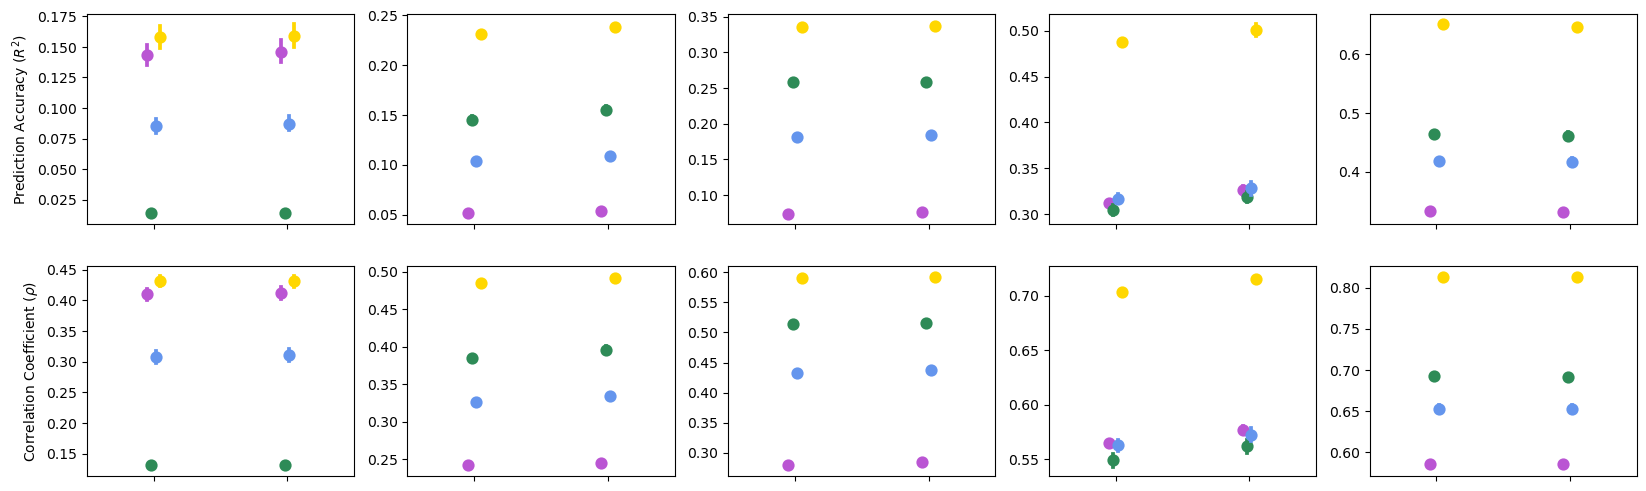

In [5]:
fig, axes = plt.subplots(2,5,figsize=(20,6)) #Create figure (11 rows by 3 columns)

m = 0
s = 0
a = sns.pointplot(ax=axes[m,s],data=df.loc[df['sess'] == 18],x="model",y="r2",hue="Brain Area",join=False,palette=colors,errorbar='sd',dodge=True)
#a.set(ylim=(0.3, 0.8))
a.set(ylabel='Prediction Accuracy ($R^2$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.get_legend().remove()

#fig.legend(bbox_to_anchor=(0.9,0.5), loc="center left")

m=m+1
a = sns.pointplot(ax=axes[m,s],data=df.loc[df['sess'] == 18],x="model",y="rho",hue="Brain Area",join=False,palette=colors,errorbar='sd',dodge=True)
#a.set(ylim=(0.3, 0.8))
a.set(ylabel=r'Correlation Coefficient ($\rho$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.get_legend().remove()

s=s+1
m = 0
a = sns.pointplot(ax=axes[m,s],data=df.loc[df['sess'] == 20],x="model",y="r2",hue="Brain Area",join=False,palette=colors,errorbar='sd',dodge=True)
#a.set(ylim=(0.3, 0.8))
#a.set(ylabel='Prediction Accuracy ($R^2$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.set(ylabel=None)
a.get_legend().remove()

#fig.legend(bbox_to_anchor=(0.9,0.5), loc="center left")

m=m+1
a = sns.pointplot(ax=axes[m,s],data=df.loc[df['sess'] == 20],x="model",y="rho",hue="Brain Area",join=False,palette=colors,errorbar='sd',dodge=True)
#a.set(ylim=(0.3, 0.8))
#a.set(ylabel=r'Correlation Coefficient ($\rho$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.set(ylabel=None)
a.get_legend().remove()

s=s+1
m = 0
a = sns.pointplot(ax=axes[m,s],data=df.loc[df['sess'] == 22],x="model",y="r2",hue="Brain Area",join=False,palette=colors,errorbar='sd',dodge=True)
#a.set(ylim=(0.3, 0.8))
#a.set(ylabel='Prediction Accuracy ($R^2$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.set(ylabel=None)
a.get_legend().remove()

#fig.legend(bbox_to_anchor=(0.9,0.5), loc="center left")

m=m+1
a = sns.pointplot(ax=axes[m,s],data=df.loc[df['sess'] == 22],x="model",y="rho",hue="Brain Area",join=False,palette=colors,errorbar='sd',dodge=True)
#a.set(ylim=(0.3, 0.8))
#a.set(ylabel=r'Correlation Coefficient ($\rho$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.set(ylabel=None)
a.get_legend().remove()

s=s+1
m = 0
a = sns.pointplot(ax=axes[m,s],data=df.loc[df['sess'] == 24],x="model",y="r2",hue="Brain Area",join=False,palette=colors,errorbar='sd',dodge=True)
#a.set(ylim=(0.3, 0.8))
#a.set(ylabel='Prediction Accuracy ($R^2$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.set(ylabel=None)
a.get_legend().remove()

#fig.legend(bbox_to_anchor=(0.9,0.5), loc="center left")

m=m+1
a = sns.pointplot(ax=axes[m,s],data=df.loc[df['sess'] == 24],x="model",y="rho",hue="Brain Area",join=False,palette=colors,errorbar='sd',dodge=True)
#a.set(ylim=(0.3, 0.8))
#a.set(ylabel=r'Correlation Coefficient ($\rho$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.set(ylabel=None)
a.get_legend().remove()

s=s+1
m = 0
a = sns.pointplot(ax=axes[m,s],data=df.loc[df['sess'] == 29],x="model",y="r2",hue="Brain Area",join=False,palette=colors,errorbar='sd',dodge=True)
#a.set(ylim=(0.3, 0.8))
#a.set(ylabel='Prediction Accuracy ($R^2$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.set(ylabel=None)
a.get_legend().remove()

#fig.legend(bbox_to_anchor=(0.9,0.5), loc="center left")

m=m+1
a = sns.pointplot(ax=axes[m,s],data=df.loc[df['sess'] == 29],x="model",y="rho",hue="Brain Area",join=False,palette=colors,errorbar='sd',dodge=True)
#a.set(ylim=(0.3, 0.8))
#a.set(ylabel=r'Correlation Coefficient ($\rho$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.set(ylabel=None)
a.get_legend().remove()


292
279
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

wc_mt+fef vs. wc_all: Mann-Whitney-Wilcoxon test two-sided, P_val:2.242e-25 U_stat=1.910e+04
wf_mt+fef vs. wf_all: Mann-Whitney-Wilcoxon test two-sided, P_val:2.015e-28 U_stat=2.011e+04
wf_mt only vs. wf_fef only: Mann-Whitney-Wilcoxon test two-sided, P_val:1.671e-77 U_stat=8.062e+04
wf_fef only vs. wf_mt+fef: Mann-Whitney-Wilcoxon test two-sided, P_val:2.956e-71 U_stat=6.242e+03
wc_mt only vs. wc_fef only: Mann-Whitney-Wilcoxon test two-sided, P_val:4.131e-77 U_stat=7.431e+04
wc_fef only vs. wc_mt+fef: Mann-Whitney-Wilcoxon test two-sided, P_val:3.358e-69 U_stat=5.439e+03
wf_fef only vs. wf_all: Mann-Whitney-Wilcoxon test two-sided, P_val:1.284e-91 U_stat=1.280e+03
wc_fef only vs. wc_all: Mann-Whitney-Wilcoxon test two-sided, P_val:9.440e-84 U_stat=2.000e+03
wf_mt only vs. wf_mt+fef: Mann-Whitney-Wi

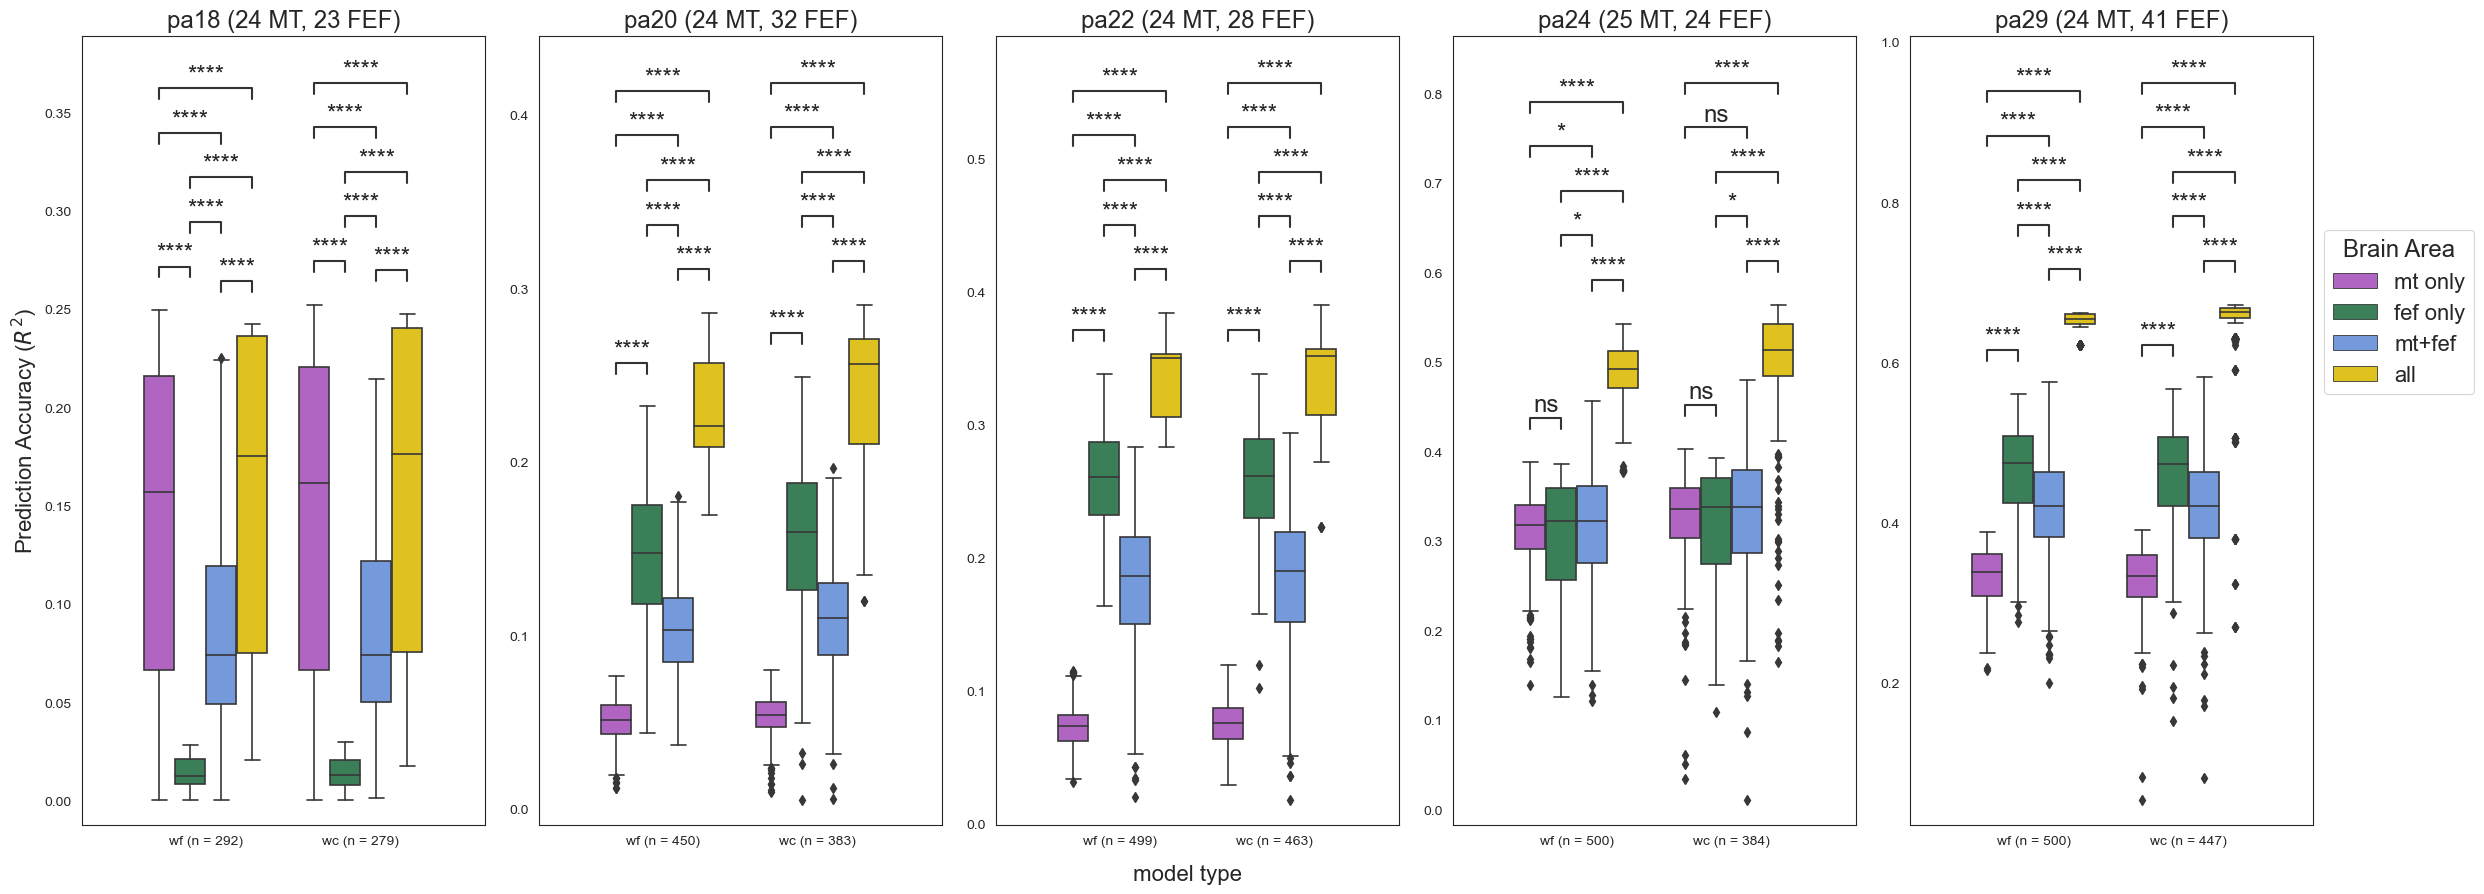

In [82]:
import matplotlib as mpl
import matplotlib.patheffects as path_effects

pairs = [
    [('wf', 'mt only'), ('wf', 'fef only')],
    [('wf', 'mt only'), ('wf', 'mt+fef')],
    [('wf', 'mt only'), ('wf', 'all')],
    [('wf', 'fef only'), ('wf', 'mt+fef')],
    [('wf', 'fef only'), ('wf', 'all')],
    [('wf', 'mt+fef'), ('wf', 'all')],

    [('wc', 'mt only'), ('wc', 'fef only')],
    [('wc', 'mt only'), ('wc', 'mt+fef')],
    [('wc', 'mt only'), ('wc', 'all')],
    [('wc', 'fef only'), ('wc', 'mt+fef')],
    [('wc', 'fef only'), ('wc', 'all')],
    [('wc', 'mt+fef'), ('wc', 'all')]
     
]

'''
[('xgb', 'mt only'), ('xgb', 'fef only')],
[('xgb', 'mt only'), ('xgb', 'mt+fef')],
[('xgb', 'fef only'), ('xgb', 'mt+fef')],

[('svr', 'mt only'), ('svr', 'fef only')],
[('svr', 'mt only'), ('svr', 'mt+fef')],
[('svr', 'fef only'), ('svr', 'mt+fef')],

[('dnn', 'mt only'), ('dnn', 'fef only')],
[('dnn', 'mt only'), ('dnn', 'mt+fef')],
[('dnn', 'fef only'), ('dnn', 'mt+fef')],

[('rnn', 'mt only'), ('rnn', 'fef only')],
[('rnn', 'mt only'), ('rnn', 'mt+fef')],
[('rnn', 'fef only'), ('rnn', 'mt+fef')],

[('gru', 'mt only'), ('gru', 'fef only')],
[('gru', 'mt only'), ('gru', 'mt+fef')],
[('gru', 'fef only'), ('gru', 'mt+fef')],

'''

fig, axes = plt.subplots(1, len(sessions), figsize=(23, 9))
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

for s in range(len(sessions)):
    with sns.plotting_context("paper", font_scale = 1.8):
        hue_plot_params = [[],[],[]]
        hue_plot_params[0] = {'data': df.loc[df['sess'] == sessions[s]],'x': 'model','y': 'r2',"hue": "Brain Area","palette": colors}
        hue_plot_params[1] = {'data': df.loc[df['sess'] == sessions[s]],'x': 'model','y': 'rho',"hue": "Brain Area","palette": colors}
        hue_plot_params[2] = {'data': df.loc[df['sess'] == sessions[s]],'x': 'model','y': 'time',"hue": "Brain Area","palette": colors}

        wf_size = int((df[(df['sess']==sessions[s]) & (df['model']=='wf')].shape[0])/4)
        wc_size = int((df[(df['sess']==sessions[s]) & (df['model']=='wc')].shape[0])/4)
        print(wf_size)
        print(wc_size)
       
        a1 = sns.boxplot(ax=axes[s], **hue_plot_params[0])
        annotator = Annotator(axes[s], pairs, **hue_plot_params[0])
        annotator.configure(test="Mann-Whitney").apply_and_annotate()
        axes[s].set_xticklabels(['wf (n = {})'.format(wf_size),'wc (n = {})'.format(wc_size)], rotation=0)
        a1.set(xlabel=None)
        a1.set(title='pa' + str(sessions[s])+' ({} MT, {} FEF)'.format(mt_perSess[s],fef_perSess[s]))
        
        if s==0:
            a1.set_ylabel('Prediction Accuracy ($R^2$)', fontsize = 16)
        else:
            a1.set(ylabel=None)
        
        if s!=len(sessions)-1:
            a1.get_legend().remove()
        else:    
            sns.move_legend(a1, "center left", bbox_to_anchor=(1, 0.65))  
            
fig.text(0.5, 0.01, 'model type', ha='center', fontsize=16)
fig.savefig(fig_folder+'ffmodels_r2_4sess.png', dpi=300, bbox_inches='tight')        

In [ ]:
mt_wf = df.loc[(df['Brain Area']=='mt only') & (df['model']=='wf'), "r2"].values
fef_wf =  df.loc[(df['Brain Area']=='fef only') & (df['model']=='wf'), "r2"].values
mtfef_wf = df.loc[(df['Brain Area']=='mt+fef') & (df['model']=='wf'), "r2"].values

stat_results = [
  mannwhitneyu(mt_wf, fef_wf, alternative="two-sided"),
  mannwhitneyu(fef_wf, mtfef_wf, alternative="two-sided"),
  mannwhitneyu(mt_wf, mtfef_wf, alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]

print("MT vs FEF: \n", stat_results[0], "\n")
print("FEF vs MT+FEF: \n", stat_results[1], "\n")
print("MT vs MT+FEF: \n", stat_results[2], "\n")

In [ ]:
ts=np.arange(0,500) #Plot samples 500-800
samp = 4

fig_traces, ax = plt.subplots(3,1,figsize=(8,10)) #Create figure (11 rows by 3 columns)

m=0 #Initialize method number. This corresponds to the row we're currently plotting in.
x = (ts*50)/1000

#WF (mix FEF + MT)
ax[m].plot(x,np.array(y_test[samp])[ts,0],'k') #Plot actual
ax[m].plot(x,np.array(y_test_pred_wf[0][0])[ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('MT Only (R2 = {:.4f})'.format(np.mean(R2s_wf[m])))
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))
#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 

#WF (FEF only)
ax[m].plot(x,np.array(y_test[samp])[ts,0],'k') #Plot actual
ax[m].plot(x,np.array(y_test_pred_wf[1][0])[ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('FEF Only (R2 = {:.4f})'.format(np.mean(R2s_wf[m])))
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))
#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1

#WF (MT only)
ax[m].plot(x,np.array(y_test[samp])[ts,0],'k') #Plot actual
ax[m].plot(x,np.array(y_test_pred_wf[2][0])[ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('MT + FEF (R2 = {:.4f})'.format(np.mean(R2s_wf[m])))
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))
#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

